In the document entitled **a first glance**, I tried to re-discover some correlations between *doctor's office waiting time* and *race/ethnicity*. Although I didn't do any statistics (yet), it looked like there was a relationship between the variables. 

Today I'm going to see how race/ethnicity correlate to the `ACC_USHURRY` or `ACC_USEXPPRB` or `ACC_USDISCUS` variables, which represent "Doctor seems to be in a hurry," "Doctor doesn't explain medical problems," and "[Health problems should] be discussed but are not."

The values are encoded in this way:

     .='Missing'
     1='1:Strongly Agree'
     2='2:Agree'
     3='3:Disagree'
     4='4:Strongly Disagree'
     5='5:No experience'
    -7='-7:Refused'
    -8="-8:Don't know"
    -9='-9:Not ascertained'

In [1]:
from IPython.display import display_pretty
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

In [2]:
mcbs_datafile = os.path.join(os.getcwd(), '..', 'data', 'ATCPUF13.csv')
df = pd.read_csv(mcbs_datafile)

# create race dict for conversion
racefmt = {1:'White',
           2:'Black',
           3:'Hispanic',
           4:'Other'}


race = df.IV_RACE.replace(racefmt)

# we only keep values 1-4 for the "agree" format
hurry = df.ACC_USHURRY
explain = df.ACC_USEXPPRB
discuss =df.ACC_USDISCUS

# construct access-to-care DataFrame
access_df = pd.DataFrame({'race': race,
                          'hurry': hurry,
                          'explain': explain,
                          'discuss': discuss})

In [3]:
# clean out all values where discuss/explain/hurry are not 1-4
access_df = access_df[((access_df.hurry <= 4) & (access_df.hurry >= 1)) &
                      ((access_df.explain <= 4) & (access_df.explain >= 1)) &
                      ((access_df.discuss <= 4) & (access_df.discuss >= 1))]

print(access_df.sample(10))

       discuss  explain  hurry      race
1710       4.0      4.0    4.0     White
12526      3.0      3.0    3.0  Hispanic
1635       4.0      4.0    4.0  Hispanic
7435       3.0      3.0    3.0     Other
6730       3.0      3.0    3.0     White
1658       4.0      4.0    3.0     Black
552        3.0      3.0    4.0     White
11601      3.0      3.0    3.0     White
12391      3.0      3.0    3.0  Hispanic
13474      4.0      4.0    4.0     Black


In [4]:
grouped_access = access_df.groupby('race')
grouped_access.aggregate(np.mean)

,discuss,explain,hurry
race,,,
Black,3.075277,3.069373,3.061993
Hispanic,3.075488,3.084369,3.043517
Other,3.073136,3.119550,3.016878
White,3.171677,3.173059,3.083502


Note: higher is better.

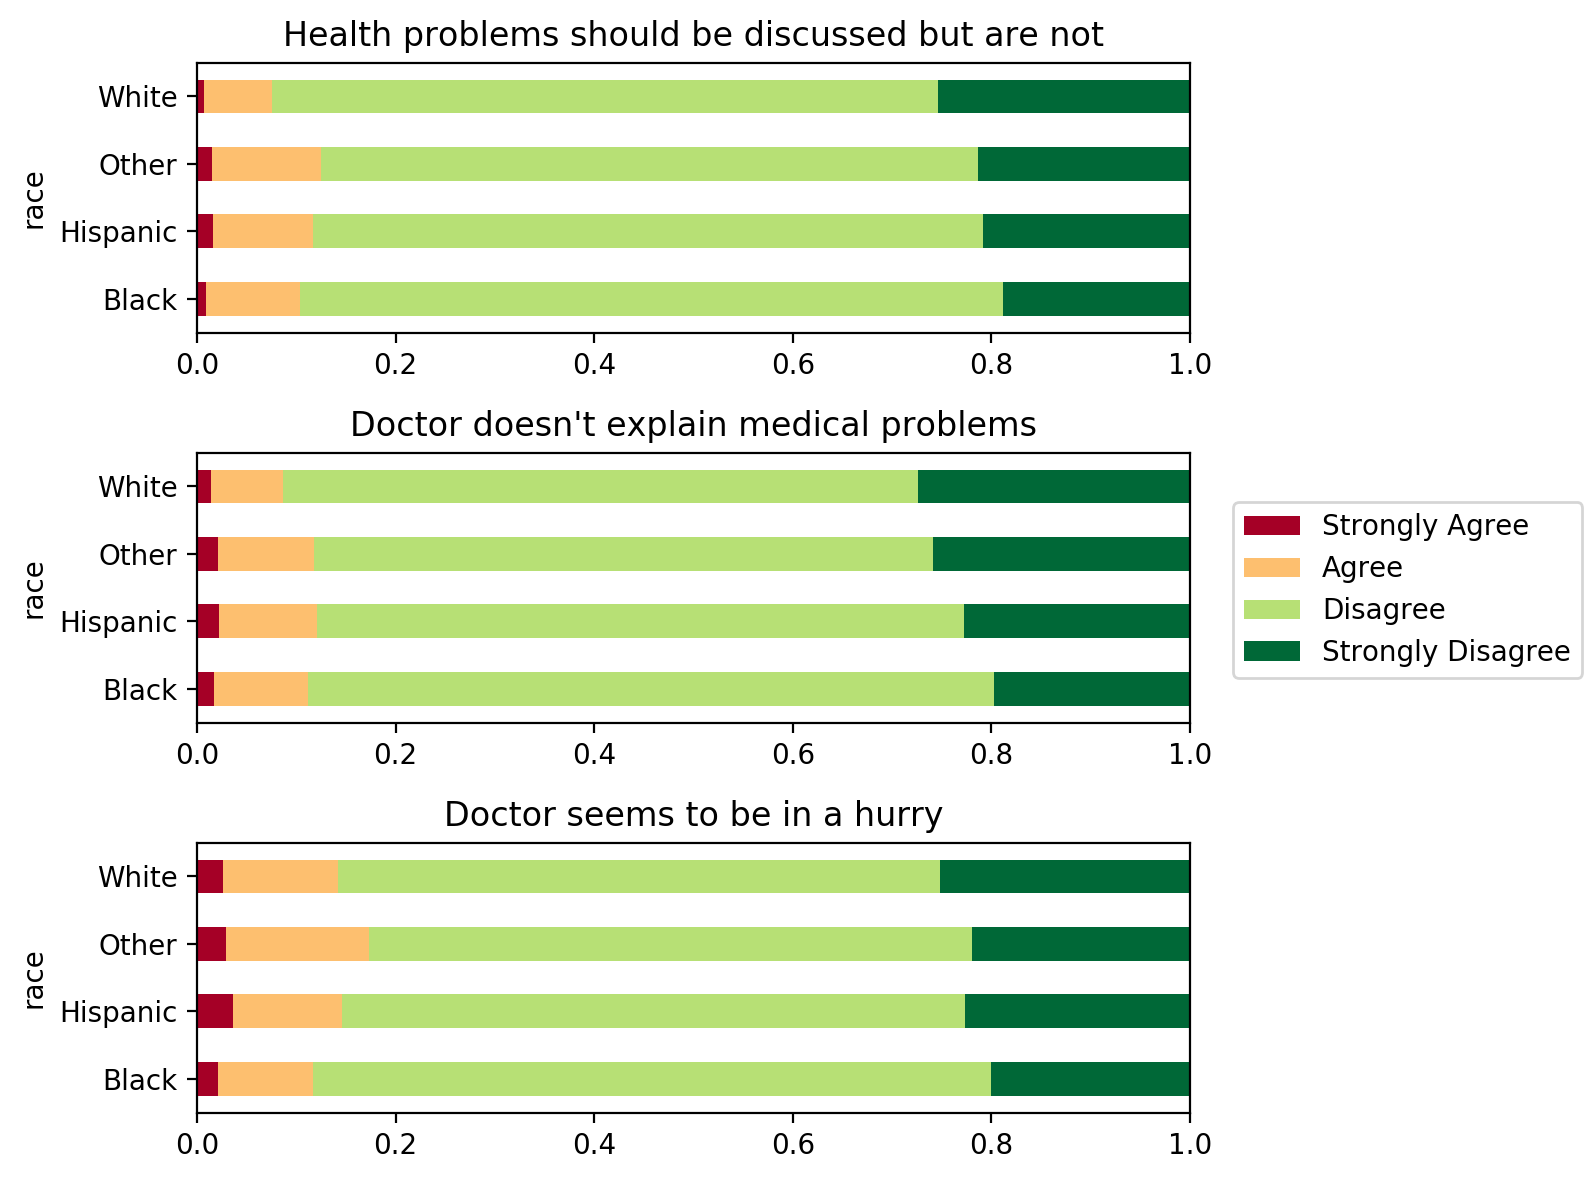

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(8, 6), dpi=200, sharex=False)

questions_fmt = {'hurry': "Doctor seems to be in a hurry",
                 'explain': "Doctor doesn't explain medical problems",
                 'discuss': "Health problems should be discussed but are not"}

for ax, cat in zip(axes, ['discuss', 'explain', 'hurry']):
    subset_df = access_df.groupby(['race', cat]).size().unstack().sort_index()
    subset_df.apply(lambda x: x / x.sum(), axis=1).plot.barh(ax=ax, colormap='RdYlGn', stacked=True, legend=False)
    ax.set_title(questions_fmt[cat])
    
    ax.set_xlim(0, 1.0)
    
fig.tight_layout()
fig.subplots_adjust(right=0.75)

# change legend format
agree_fmt = {1: 'Strongly Agree',
             2: 'Agree',
             3: 'Disagree',
             4: 'Strongly Disagree'}

handles, labels = ax.get_legend_handles_labels()
new_labels = [agree_fmt[int(z[0])] for z in labels]

legend = fig.legend(handles, new_labels, loc='center right')
legend.set_alpha(1.0)